In [2]:
###### THIS CODE SIMULATES BOTH INDIVIDUAL OPERATION AND
###### FULL STEPPED FREQUENCY WITH LFM SIGNAL
###### FOR MORE DETAILS SEE OFFICIAL SFCW CODE, THIS IS THE SAME THING JUST
###### USES SIMULATIONS, VARIABLES WERE FREQUENTLY CHANGED TO PROVIDE
###### FURTHER UNDERSTANDING OF DATA. DO NOT USE THIS TO PROCESS ANY REAL
###### DATA
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq


## create the signal
Bi = 20e6; # bandwidth of sub-pulse
fs = 20e6; # sampling rate (2BW)
samps = 138000*2 # number of samples per chirp
Tp = samps/fs # pulse duration

def w(t, Bi, Tp):
    send_chirp = np.array(np.exp(1j*np.pi*.5*(Bi/Tp)*(t**2)), dtype = np.complex64)
    #N=4096
    #send_chirp = np.pad(send_chirp, (N), 'constant', constant_values=(0))
    return send_chirp
    
    


0.0138


In [3]:
t = np.arange(-Tp/2, Tp/2,1/fs); # negative time vector centering pulse at 0    

w_tm = w(t, Bi, Tp); # create the chirp from w() function


w_tm1 = w_tm; # simply rename chirp to not mess up original

N = len(w_tm1); # length of chirp

In [23]:
######### w_tm1 can be used as a reference signal. Now we need a simulated
######### receive signal. Must add noise and delay

noise = .2*np.random.random_sample(N); # create noise vector

w_tm2 = np.roll(w_tm1, -10)+noise; # delay and add the noise

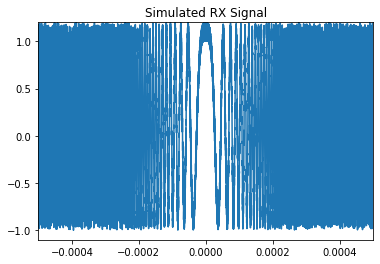

In [24]:
#plt.set(0,'defaultfigurecolor',[1 1 1]) #plot
plt.plot(t, np.real(w_tm2))
plt.title('Simulated RX Signal')
plt.ylim([-1.1, 1.2])
plt.xlim([-.0005, .0005])

plt.show()


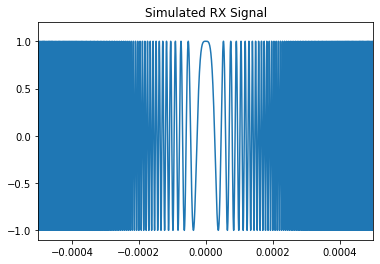

In [25]:
#plt.set(0,'defaultfigurecolor',[1 1 1]) #plot
plt.plot(t, np.real(w_tm1))
plt.title('Simulated RX Signal')
plt.ylim([-1.1, 1.2])
plt.xlim([-.0005, .0005])

plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


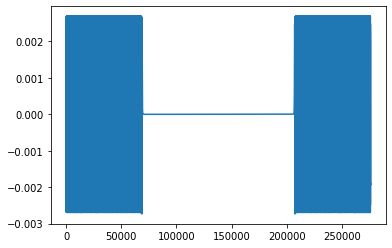

In [41]:
#--- Matched Filtering ------------------------------------------
# this section performs the matched filter using the paramters of an ideal
H = fft(w_tm1)/N;
plt.plot(H)

/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


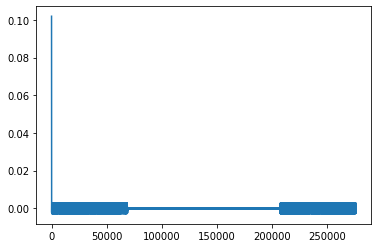

In [43]:
X = np.conj(fft(w_tm2)/N);
plt.plot(X)

In [36]:
Y=X*H; # perform match filter


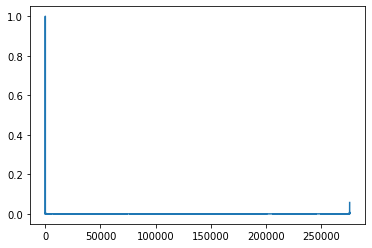

In [42]:
y1=(ifft(Y)); # fftshift the response
plt.plot(np.abs(y1)/max(np.abs(y1)))

#plt.xlim([0,100])
plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


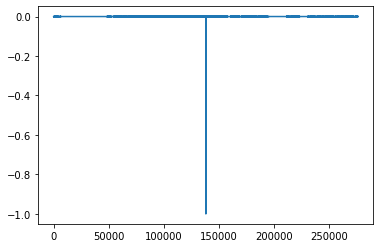

In [45]:
from scipy import signal

sig = X

win = H

filtered = signal.convolve(sig, win, mode='same') / sum(win)
plt.plot(filtered)

In [ ]:
N2 = length(y1)/2; # number of samples used for vector
y = y1(:,[138000:276000]);; # take the middle sample as t=0 there
y = y./max(y); # normalize

fs2 = 4.4e9;
N3=length(y); # used for axis scaling
To2 = N3/fs2; # pulse duration
c=3e8;
tt = 0:c*To2/(N3-1):To2*c; # time vector
fc1 = 800e6; BWf1 = 4.2e9;
N = length(Y);
f1 =fc1:BWf1/(N-1):(fc1+BWf1);

In [ ]:

#time vector in micro seconds
#----Plot matched filter output-----------------------------
# figure()
set(0,'defaultfigurecolor',[1 1 1])
plot(abs(y))
set(gca,'color','w');
xlabel('Distance(m)')
ylabel('Normalized Magnitude')
xlim([0 30])
ylim([0 1.1])
title('Simulated Matched Filter Output');
grid on

figure()
plot(f1,abs(fftshift(Y)))